<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Segmenting and Clustering Neighborhoods in Toronto City</font></h1>
<h1 align=center><font size = 5>Moaeed Sajid - May 2020</font></h1>
<h1 align=center><font size = 5>Part 3</font></h1>


## Introduction

In this assignment, we will explore, segment, and cluster the neighborhoods in the city of Toronto. However, unlike New York, the neighborhood data is not readily available on the internet. This will require me to be agile and refine my skills to learn new libraries and tools quickly depending on the project.

*Part 1*

For the Toronto neighborhood data, a Wikipedia page exists that has all the information we need to explore and cluster the neighborhoods in Toronto. We will scrape the Wikipedia page and wrangle the data, clean it, and then read it into a pandas dataframe so that it is in a structured format like the New York dataset.

*Part 2*

Import the latitude and longtitude of each area

*Part 3*

Once the data is in a structured format, replicate the analysis applied to the New York City dataset, to explore and cluster the neighborhoods in the city of Toronto.

*Viewing in Githb*

All the content in these notebooks may not display within Github and so feel free to view this code on nbviewer

https://nbviewer.jupyter.org/github/moaeedsajid/Coursera_Capstone/blob/master/Week3_Part1.ipynb
https://nbviewer.jupyter.org/github/moaeedsajid/Coursera_Capstone/blob/master/Week3_Part2.ipynb
https://nbviewer.jupyter.org/github/moaeedsajid/Coursera_Capstone/blob/master/Week3_Part3.ipynb

#### Load our DataFrame from CSV File


In [1]:
import pandas as pd 

dfToronto = pd.read_csv('dfTorontoLL.csv', header = 0)
display(dfToronto)

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.752935,-79.335641
1,M4A,North York,Victoria Village,43.728102,-79.311890
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.723265,-79.451211
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653340,-79.509766
99,M4Y,Downtown Toronto,Church and Wellesley,43.666659,-79.381472
100,M7Y,East Toronto,Business reply mail Processing Centre,43.648700,-79.385450
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.632798,-79.493017


### Let's just get those areas with Toronto in the Borough

UPDATE - This was not giving a good model so we will work with all the postcodes

In [2]:
# Create a dataframe with neighbourhoods with Toronto in the borough
#dfTorontoOnly = dfToronto[dfToronto['Borough'].str.contains('Toronto')]
#dfTorontoOnly.reset_index(drop = True, inplace = True)
#display(dfTorontoOnly)

### Create a map of Toronto Boroughs using Folium


In [3]:
# We will need the central co-ordinates for Toronto
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

# create map of Toroto using latitude and longitude values
import folium
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, postalcode, neighbourhood in zip(dfToronto['Latitude'], 
dfToronto['Longitude'], dfToronto['PostalCode'], dfToronto['Neighbourhood']):
    label = '{}  ({})'.format(postalcode, neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

The geograpical coordinates of Toronto are 43.6534817, -79.3839347.


### Map display for Github

Folium maps do not always display in github so I have added a workaround below.  As this displays as an image the popup labels will not be able to be displayed.  

To view the labels, open this notebook using nbviewer - https://nbviewer.jupyter.org/github/moaeedsajid/Coursera_Capstone/blob/master/Week3_Part3.ipynb

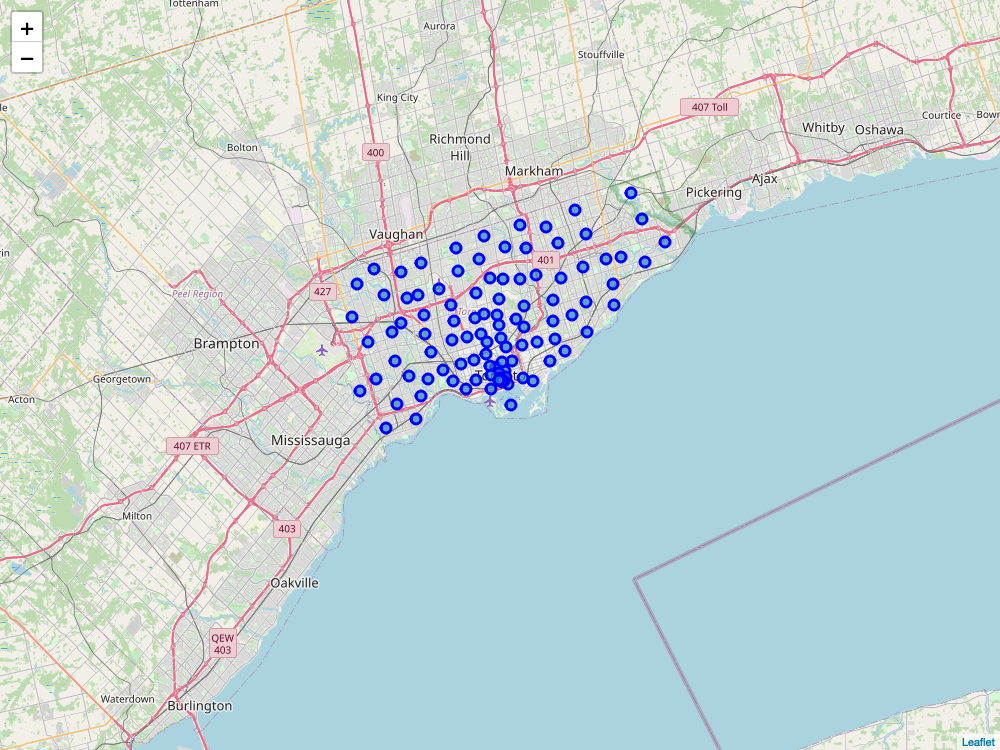

In [4]:
#!conda install -c conda-forge selenium --yes
import selenium.webdriver
import time

driver = selenium.webdriver.PhantomJS(executable_path='/Users/moaeedsajid/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs')
driver.set_window_size(1000, 750)  # choose a resolution
map_toronto.save('map_toronto.html')
driver.get('map_toronto.html')
time.sleep(3)
driver.save_screenshot('map_toronto.png')

%matplotlib inline
from IPython.display import Image
Image('map_toronto.png')

### Define FourSquare Credentials



In [5]:

sys.path.append('../') # Credentials file is in a sub directory so allow it to be loaded 
import credentials
# Below 2 lines required if credentials had been updated
#from importlib import reload
#reload(credentials)

CLIENT_ID = credentials.foursquare['client_id']# your Foursquare ID
CLIENT_SECRET = credentials.foursquare['client_secret'] # your Foursquare Secret
ACCESS_TOKEN = credentials.foursquare['access_token']
VERSION = '20180605'

print("FourSquare Credentials Retrieved")

FourSquare Credentials Retrieved


### Code to Retrieve FourSquare information for each area

The following function will retrieve our Foursquares information for each neighbourhood.  I have added in *time* and *day* values so it covers the whole week rather than just the time the query is run.  

I have also sorted locations by popularity.

This function is to be run in the next section




In [6]:
def getNearbyVenues(names, neighbourhoods, latitudes, longitudes, radius=500, limit=100):
    
    venues_list=[]
    for name, neighbourhood, lat, lng in zip(names, neighbourhoods, latitudes, longitudes):
        print('\r',name, end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&time=any&day=any&sortByPopularity=1&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        #return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            neighbourhood, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    print(venues_list)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    print(nearby_venues)
    nearby_venues.columns = ['PostalCode', 
                  'Neighbourhood', 
                  'PostalCode Latitude',
                  'PostalCode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### Retrieveing area information for each set of neighbourhoods


In [7]:
import requests

toronto_venues = getNearbyVenues(names=dfToronto['PostalCode'],
                                   neighbourhoods=dfToronto['Neighbourhood'],
                                   latitudes=dfToronto['Latitude'],
                                   longitudes=dfToronto['Longitude']
                                  )

print(" \nThe shape of the toronto venues dataframe is {}".format(toronto_venues.shape))

print("\nThe following table shows how many venues were returned for each postcode \n")
display(toronto_venues[['PostalCode', 'Venue']].groupby('PostalCode').count())
print('\n There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

easons Centre for the Performing Arts', 43.650592, -79.385806, 'Concert Hall'), ('M7Y', 'Business reply mail Processing Centre', 43.648700000000076, -79.38544999999993, 'Princess Of Wales Theatre', 43.64654315405365, -79.38910030187289, 'Theater'), ('M7Y', 'Business reply mail Processing Centre', 43.648700000000076, -79.38544999999993, 'The Keg Steakhouse + Bar - York Street', 43.64998659318569, -79.38410336664538, 'Restaurant'), ('M7Y', 'Business reply mail Processing Centre', 43.648700000000076, -79.38544999999993, 'Pizzeria Libretto', 43.64833354686235, -79.38511050184168, 'Pizza Place'), ('M7Y', 'Business reply mail Processing Centre', 43.648700000000076, -79.38544999999993, 'Drake One Fifty', 43.649589523564934, -79.38455694587901, 'Restaurant'), ('M7Y', 'Business reply mail Processing Centre', 43.648700000000076, -79.38544999999993, 'Royal Alexandra Theatre', 43.647255, -79.38753, 'Theater'), ('M7Y', 'Business reply mail Processing Centre', 43.648700000000076, -79.38544999999993,

,Venue
PostalCode,
M1B,1
M1C,1
M1E,22
M1G,4
M1H,4
...,...
M9N,4
M9P,7
M9R,8



 There are 262 uniques categories.


In [8]:
toronto_venues


,PostalCode,Neighbourhood,PostalCode Latitude,PostalCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,M3A,Parkwoods,43.752935,-79.335641,Brookbanks Park,43.751976,-79.332140,Park
1,M3A,Parkwoods,43.752935,-79.335641,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,M4A,Victoria Village,43.728102,-79.311890,Wigmore Park,43.731023,-79.310771,Park
3,M4A,Victoria Village,43.728102,-79.311890,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,M4A,Victoria Village,43.728102,-79.311890,The Frig,43.727051,-79.317418,French Restaurant
...,...,...,...,...,...,...,...,...
2261,M8Z,"Mimico NW, The Queensway West, South of Bloor,...",43.625490,-79.526000,Kingsway Boxing Club,43.627254,-79.526684,Gym
2262,M8Z,"Mimico NW, The Queensway West, South of Bloor,...",43.625490,-79.526000,Burrito Boyz,43.621791,-79.522601,Burrito Place
2263,M8Z,"Mimico NW, The Queensway West, South of Bloor,...",43.625490,-79.526000,Tactical Products Canada,43.626801,-79.529388,Miscellaneous Shop
2264,M8Z,"Mimico NW, The Queensway West, South of Bloor,...",43.625490,-79.526000,Mangosteens Thai Cuisine,43.621419,-79.524771,Thai Restaurant


### Prepare for our K-means algorithm

In [9]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add postalcode column back to dataframe and move to the front
toronto_onehot['PostalCode'] = toronto_venues['PostalCode']
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print("\n The shape of our venues dataframe after one hot encoding is {}\n,".format(toronto_onehot.shape))
display(toronto_onehot.head())

print("\n Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category \n")

toronto_grouped = toronto_onehot.groupby('PostalCode').mean().reset_index()
print("\n The shape of our venues dataframe after taking the mean frequency is {}\n ,".format(toronto_grouped.shape))

display(toronto_grouped)

print("\n The top 5 venues for each postcode are... \n"),

num_top_venues = 5

for postalCode in toronto_grouped['PostalCode']:
    print("----"+postalCode+"----")
    temp = toronto_grouped[toronto_grouped['PostalCode'] == postalCode].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[2:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

print("\n This is good but let's select the top 10 venues, sort them and put that into a pandas dataframe \n")

#First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postalCode_venues_sorted = pd.DataFrame(columns=columns)
postalCode_venues_sorted['PostalCode'] = toronto_grouped['PostalCode']

for ind in np.arange(toronto_grouped.shape[0]):
    postalCode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

display(postalCode_venues_sorted)


 The shape of our venues dataframe after one hot encoding is (2266, 263)
,


,PostalCode,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M3A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,M3A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,M4A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,M4A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,M4A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



 Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category 


 The shape of our venues dataframe after taking the mean frequency is (101, 263)
 ,


,PostalCode,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,M1B,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,M1C,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,M1E,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,M1G,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,M1H,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,M9N,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
97,M9P,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
98,M9R,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
99,M9V,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0



 The top 5 venues for each postcode are... 

----M1B----
               venue  freq
0              Trail   1.0
1  Afghan Restaurant   0.0
2        Music Store   0.0
3          Nightclub   0.0
4       Night Market   0.0


----M1C----
                             venue  freq
0       Construction & Landscaping   1.0
1        Middle Eastern Restaurant   0.0
2       Modern European Restaurant   0.0
3  Molecular Gastronomy Restaurant   0.0
4              Monument / Landmark   0.0


----M1E----
                  venue  freq
0           Pizza Place  0.09
1              Pharmacy  0.09
2  Fast Food Restaurant  0.09
3           Coffee Shop  0.09
4                  Bank  0.05


----M1G----
                venue  freq
0         Coffee Shop  0.50
1  Mexican Restaurant  0.25
2   Korean Restaurant  0.25
3   Afghan Restaurant  0.00
4        Neighborhood  0.00


----M1H----
                        venue  freq
0  Construction & Landscaping  0.25
1                 Gaming Cafe  0.25
2                     

,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Trail,Yoga Studio,Farm,Eastern European Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farmers Market,Dog Run
1,M1C,Construction & Landscaping,Food Court,Food,Flower Shop,Fish Market,Fish & Chips Shop,Financial or Legal Service,Field,Fast Food Restaurant,Farmers Market
2,M1E,Fast Food Restaurant,Pharmacy,Pizza Place,Coffee Shop,Intersection,Mexican Restaurant,Bus Line,Breakfast Spot,Salon / Barbershop,Sports Bar
3,M1G,Coffee Shop,Mexican Restaurant,Korean Restaurant,Farmers Market,Elementary School,Ethiopian Restaurant,Falafel Restaurant,Farm,Fast Food Restaurant,Eastern European Restaurant
4,M1H,Construction & Landscaping,Lounge,Trail,Gaming Cafe,Fish & Chips Shop,Financial or Legal Service,Field,Fish Market,Eastern European Restaurant,Fast Food Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
96,M9N,Gift Shop,Pharmacy,Grocery Store,Breakfast Spot,Fish & Chips Shop,Fish Market,Financial or Legal Service,Field,Fast Food Restaurant,Donut Shop
97,M9P,Pizza Place,Intersection,Sandwich Place,Discount Store,Coffee Shop,Chinese Restaurant,Middle Eastern Restaurant,Field,Fast Food Restaurant,Farmers Market
98,M9R,Pizza Place,Shopping Mall,Sandwich Place,Coffee Shop,Liquor Store,American Restaurant,Pharmacy,Bank,Financial or Legal Service,Field
99,M9V,Grocery Store,Fast Food Restaurant,Beer Store,Liquor Store,Fried Chicken Joint,Park,Caribbean Restaurant,Video Store,Hardware Store,Pizza Place


### Let's cluster this using K-Means


,K,Silhouette,Harabasz,Model Split
0,2,0.194955,10.084103,"(22, 79)"
1,3,0.185043,8.234937,"(79, 1, 21)"
2,4,0.212437,8.214144,"(22, 2, 76, 1)"
3,5,0.214564,8.109432,"(3, 1, 77, 1, 19)"
4,6,0.179992,7.306549,"(6, 68, 4, 2, 20, 1)"
5,7,0.200079,7.315143,"(1, 3, 74, 1, 20, 1, 1)"
6,8,0.188533,7.585360,"(1, 2, 75, 1, 1, 1, 19, 1)"
7,9,0.192941,7.398307,"(1, 2, 74, 1, 1, 1, 19, 1, 1)"
8,10,0.161737,7.369127,"(1, 3, 68, 5, 1, 1, 17, 1, 3, 1)"
9,11,0.161197,6.973054,"(1, 3, 67, 5, 1, 1, 17, 1, 3, 1, 1)"


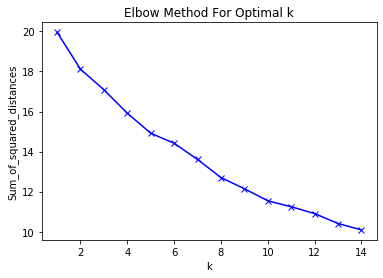

In [11]:
import collections

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

# set number of clusters
K = range(1,15)
metricScoresDf = pd.DataFrame(columns=('K','Silhouette', ' Harabasz'))

toronto_grouped_clustering = toronto_grouped.drop('PostalCode', 1)

# run k-means clustering
Sum_of_squared_distances = []
for k in K:
    k_means = KMeans(n_clusters=k, random_state = 0)
    model = k_means.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(k_means.inertia_)
    y_hat = k_means.predict(toronto_grouped_clustering)
    labels = k_means.labels_
    if k != 1:
        silhouette = metrics.silhouette_score(toronto_grouped_clustering, labels, metric = 'euclidean')
        harabasz = metrics.calinski_harabasz_score(toronto_grouped_clustering, labels)
        modelSplit = collections.Counter(model.labels_).values()
        metricScoresDf = metricScoresDf.append({'K':k,'Silhouette':silhouette, ' Harabasz':harabasz, 'Model Split':modelSplit}, ignore_index = True)

display(metricScoresDf)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 

### Model

I want to see if this model can be improved.  It is possible that businesses from other postcodes are overlapping so we will see if we can improve it by only selecting items with a matching postalcode.

We will need to update our foursquare query to include the address as well

In [12]:
def getNearbyVenues(names, neighbourhoods, latitudes, longitudes, radius=500, limit=100):
    
    venues_list=[]
    for name, neighbourhood, lat, lng in zip(names, neighbourhoods, latitudes, longitudes):
        print('\r',name, end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&time=any&day=any&sortByPopularity=1&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        #return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            neighbourhood, 
            lat, 
            lng,
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'], 
            v['venue']['location']['formattedAddress'], 
            v['venue']['categories'][0]['name']) for v in results])
    #print(venues_list)

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    #print(nearby_venues)
    nearby_venues.columns = ['PostalCode', 
                  'Neighbourhood', 
                  'PostalCode Latitude',
                  'PostalCode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude',
                  'Venue Address', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
toronto_venues = getNearbyVenues(names=dfToronto['PostalCode'],
                                 neighbourhoods=dfToronto['Neighbourhood'],
                                 latitudes=dfToronto['Latitude'],
                                 longitudes=dfToronto['Longitude']
                                )

print(" \nThe shape of the toronto venues dataframe is {}".format(toronto_venues.shape))

print("\nThe following table shows how many venues were returned for each postcode \n")
display(toronto_venues[['PostalCode', 'Venue']].groupby('PostalCode').count())
print('\n There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))


M8Z 
The shape of the toronto venues dataframe is (2266, 9)

The following table shows how many venues were returned for each postcode 



,Venue
PostalCode,
M1B,1
M1C,1
M1E,22
M1G,4
M1H,4
...,...
M9N,4
M9P,7
M9R,8



 There are 262 uniques categories.


In [14]:
# Convert address to string so we can work with it
toronto_venues['Venue Address'] = toronto_venues['Venue Address'].astype(str)

# Postcode format for first three letters
postcode = r'(M\d[A-Z])'

#Extract postcode and add it to a new column
toronto_venues['Venue PostalCode'] = toronto_venues['Venue Address'].str.extract(postcode)
display(toronto_venues)

# New dataframe with only those venues where the postcode matches
clean_venues = toronto_venues[toronto_venues['PostalCode'] == toronto_venues['Venue PostalCode']]
display(clean_venues)

,PostalCode,Neighbourhood,PostalCode Latitude,PostalCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Address,Venue Category,Venue PostalCode
0,M3A,Parkwoods,43.752935,-79.335641,Brookbanks Park,43.751976,-79.332140,"['Toronto', 'Toronto ON', 'Canada']",Park,NaN
1,M3A,Parkwoods,43.752935,-79.335641,Variety Store,43.751974,-79.333114,"['29 Valley Woods Road', 'Toronto ON', 'Canada']",Food & Drink Shop,NaN
2,M4A,Victoria Village,43.728102,-79.311890,Wigmore Park,43.731023,-79.310771,"['Toronto ON', 'Canada']",Park,NaN
3,M4A,Victoria Village,43.728102,-79.311890,Tim Hortons,43.725517,-79.313103,"['1733 Eglinton Ave East (at Bermondsey Rd)', ...",Coffee Shop,M4A
4,M4A,Victoria Village,43.728102,-79.311890,The Frig,43.727051,-79.317418,['Canada'],French Restaurant,NaN
...,...,...,...,...,...,...,...,...,...,...
2261,M8Z,"Mimico NW, The Queensway West, South of Bloor,...",43.625490,-79.526000,Kingsway Boxing Club,43.627254,-79.526684,"['22-B Jutland Rd. (kipling)', 'Toronto ON M8Z...",Gym,M8Z
2262,M8Z,"Mimico NW, The Queensway West, South of Bloor,...",43.625490,-79.526000,Burrito Boyz,43.621791,-79.522601,"['1197 The Queensway (at Kipling)', 'Toronto O...",Burrito Place,M8Z
2263,M8Z,"Mimico NW, The Queensway West, South of Bloor,...",43.625490,-79.526000,Tactical Products Canada,43.626801,-79.529388,['736 Kipling ave (Kipling and the Queensway)'...,Miscellaneous Shop,M8Z
2264,M8Z,"Mimico NW, The Queensway West, South of Bloor,...",43.625490,-79.526000,Mangosteens Thai Cuisine,43.621419,-79.524771,"['1244 The Queensway (Kipling)', 'Toronto ON',...",Thai Restaurant,NaN


,PostalCode,Neighbourhood,PostalCode Latitude,PostalCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Address,Venue Category,Venue PostalCode
3,M4A,Victoria Village,43.728102,-79.311890,Tim Hortons,43.725517,-79.313103,"['1733 Eglinton Ave East (at Bermondsey Rd)', ...",Coffee Shop,M4A
6,M4A,Victoria Village,43.728102,-79.311890,Pizza Nova,43.725824,-79.312860,"['1733 Eglinton Ave. E (at Bermondsey Rd.)', '...",Pizza Place,M4A
7,M4A,Victoria Village,43.728102,-79.311890,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,['Eglinton Avenue East (at Sloan Avenue / Berm...,Intersection,M4A
8,M4A,Victoria Village,43.728102,-79.311890,Cash Money,43.725486,-79.312665,['1733 Eglinton Ave E (Eglinton and Victoria P...,Financial or Legal Service,M4A
10,M5A,"Regent Park, Harbourfront",43.650964,-79.353041,Cooper Koo Family YMCA,43.653249,-79.358008,"['461 Cherry St', 'Toronto ON M5A 0H7', 'Canada']",Distribution Center,M5A
...,...,...,...,...,...,...,...,...,...,...
2259,M8Z,"Mimico NW, The Queensway West, South of Bloor,...",43.625490,-79.526000,RBC Royal Bank,43.621145,-79.524719,"['1233 THE QUEENSWAY (at Kipling)', 'Etobicoke...",Bank,M8Z
2260,M8Z,"Mimico NW, The Queensway West, South of Bloor,...",43.625490,-79.526000,Sleep Country,43.621340,-79.526708,"['1278 The Queensway', 'Etobicoke ON M8Z 1S3',...",Mattress Store,M8Z
2261,M8Z,"Mimico NW, The Queensway West, South of Bloor,...",43.625490,-79.526000,Kingsway Boxing Club,43.627254,-79.526684,"['22-B Jutland Rd. (kipling)', 'Toronto ON M8Z...",Gym,M8Z
2262,M8Z,"Mimico NW, The Queensway West, South of Bloor,...",43.625490,-79.526000,Burrito Boyz,43.621791,-79.522601,"['1197 The Queensway (at Kipling)', 'Toronto O...",Burrito Place,M8Z


In [15]:
# one hot encoding
toronto_onehot = pd.get_dummies(clean_venues[['Venue Category']], prefix="", prefix_sep="")

# add postalcode column back to dataframe and move to the front
toronto_onehot['PostalCode'] = clean_venues['PostalCode']
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print("\n The shape of our venues dataframe after one hot encoding is {}\n,".format(toronto_onehot.shape))
display(toronto_onehot.head())

print("\n Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category \n")
toronto_grouped = toronto_onehot.groupby('PostalCode').mean().reset_index()
print("\n The shape of our venues dataframe after taking the mean frequency is {}\n ,".format(toronto_grouped.shape))

display(toronto_grouped)

print("\n Let's select the top 10 venues, sort them and put that into a pandas dataframe \n")

#First, let's write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
import numpy as np

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['PostalCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postalCode_venues_sorted = pd.DataFrame(columns=columns)
postalCode_venues_sorted['PostalCode'] = toronto_grouped['PostalCode']

for ind in np.arange(toronto_grouped.shape[0]):
    postalCode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

display(postalCode_venues_sorted)


 The shape of our venues dataframe after one hot encoding is (1026, 206)
,


,PostalCode,Afghan Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,...,Thrift / Vintage Store,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
3,M4A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,M4A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,M4A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,M4A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,M5A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



 Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category 


 The shape of our venues dataframe after taking the mean frequency is (84, 206)
 ,


,PostalCode,Afghan Restaurant,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Auto Garage,...,Thrift / Vintage Store,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,M1C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,M1E,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,M1H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,M1J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,M1K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,M9N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
80,M9P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
81,M9R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
82,M9V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.0,0.0



 Let's select the top 10 venues, sort them and put that into a pandas dataframe 



,PostalCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1C,Construction & Landscaping,Yoga Studio,Diner,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant
1,M1E,Coffee Shop,Fast Food Restaurant,Pizza Place,Pharmacy,Bank,Fried Chicken Joint,Intersection,Supermarket,Beer Store,Breakfast Spot
2,M1H,Construction & Landscaping,Yoga Studio,Diner,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant
3,M1J,Sandwich Place,Big Box Store,Yoga Studio,Financial or Legal Service,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store
4,M1K,Discount Store,Coffee Shop,Department Store,Yoga Studio,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store
...,...,...,...,...,...,...,...,...,...,...,...
79,M9N,Pharmacy,Gift Shop,Yoga Studio,Dessert Shop,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant
80,M9P,Sandwich Place,Coffee Shop,Pizza Place,Discount Store,Middle Eastern Restaurant,Chinese Restaurant,Yoga Studio,Diner,Falafel Restaurant,Ethiopian Restaurant
81,M9R,Liquor Store,Pharmacy,Coffee Shop,Pizza Place,Bank,Diner,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School
82,M9V,Fast Food Restaurant,Pharmacy,Beer Store,Fried Chicken Joint,Pizza Place,Liquor Store,Video Store,Grocery Store,Hardware Store,Convenience Store


,K,Silhouette,Harabasz,Model Split
0,2,0.325962,10.607506,"(5, 79)"
1,3,0.329399,7.296746,"(5, 78, 1)"
2,4,0.056088,7.591248,"(4, 60, 16, 4)"
3,5,0.344863,7.215112,"(5, 74, 1, 3, 1)"
4,6,0.361277,6.745227,"(4, 74, 1, 3, 1, 1)"
5,7,0.354899,6.542080,"(4, 73, 1, 3, 1, 1, 1)"
6,8,0.330461,6.555109,"(4, 71, 1, 4, 1, 1, 1, 1)"
7,9,0.328350,6.562788,"(4, 70, 1, 4, 1, 1, 1, 1, 1)"
8,10,0.155813,6.201445,"(5, 68, 1, 1, 1, 3, 1, 2, 1, 1)"
9,11,0.164513,6.423197,"(5, 67, 1, 1, 1, 3, 1, 2, 1, 1, 1)"


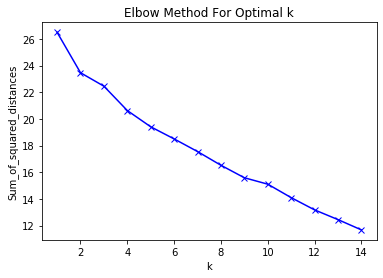

In [16]:
# set number of clusters
K = range(1,15)
metricScoresDf = pd.DataFrame(columns=('K','Silhouette', ' Harabasz'))

toronto_grouped_clustering = toronto_grouped.drop('PostalCode', 1)

# run k-means clustering
Sum_of_squared_distances = []
for k in K:
    k_means = KMeans(n_clusters=k, random_state = 0)
    model = k_means.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(k_means.inertia_)
    y_hat = k_means.predict(toronto_grouped_clustering)
    labels = k_means.labels_
    if k != 1:
        silhouette = metrics.silhouette_score(toronto_grouped_clustering, labels, metric = 'euclidean')
        harabasz = metrics.calinski_harabasz_score(toronto_grouped_clustering, labels)
        modelSplit = collections.Counter(model.labels_).values()
        metricScoresDf = metricScoresDf.append({'K':k,'Silhouette':silhouette, ' Harabasz':harabasz, 'Model Split':modelSplit}, ignore_index = True)

display(metricScoresDf)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
# check cluster labels generated for each row in the dataframe
#kmeans.labels_[0:10] 

### Moving forward

I think 4 clusters gives our best silhouette score and there is some segmentation across the labels.  We will move forward with this.

In [19]:
k_means = KMeans(n_clusters=4, random_state = 0)
model = k_means.fit(toronto_grouped_clustering)
# check cluster labels generated for each row in the dataframe
collections.Counter(model.labels_).values()

dict_values([4, 60, 16, 4])

In [22]:
# add clustering labels
postalCode_venues_sorted.drop(['Cluster Labels'], axis=1, inplace=True)
postalCode_venues_sorted.insert(0, 'Cluster Labels', model.labels_)

toronto_merged = dfToronto

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(postalCode_venues_sorted.set_index('PostalCode'), on='PostalCode')

# Drop where we did not have enough info to cluster
toronto_merged.dropna(subset = ["Cluster Labels"], inplace=True)
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)
display(toronto_merged)

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,M4A,North York,Victoria Village,43.728102,-79.311890,0,Financial or Legal Service,Coffee Shop,Pizza Place,Intersection,Cosmetics Shop,Creperie,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041,2,Pub,Café,Mexican Restaurant,Seafood Restaurant,Bank,Bakery,Distribution Center,Chocolate Shop,Athletics & Sports,Performing Arts Venue
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.723265,-79.451211,2,Clothing Store,Furniture / Home Store,American Restaurant,Cosmetics Shop,Restaurant,Food Court,Bookstore,Dessert Shop,Movie Theater,Jewelry Store
7,M3B,North York,Don Mills,43.748900,-79.357220,2,Restaurant,Athletics & Sports,Bank,Yoga Studio,Discount Store,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.707193,-79.311529,2,Fast Food Restaurant,Gym / Fitness Center,Athletics & Sports,Bank,Gastropub,Pizza Place,Pet Store,Pharmacy,Rock Climbing Spot,Breakfast Spot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,M5X,Downtown Toronto,"First Canadian Place, Underground city",43.648269,-79.381884,0,Coffee Shop,American Restaurant,Burger Joint,Gym / Fitness Center,Bakery,Yoga Studio,Discount Store,Farmers Market,Farm,Falafel Restaurant
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653340,-79.509766,2,Pool,Yoga Studio,Diner,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant
99,M4Y,Downtown Toronto,Church and Wellesley,43.666659,-79.381472,2,Coffee Shop,Restaurant,Japanese Restaurant,Gay Bar,Café,Grocery Store,Dance Studio,Sushi Restaurant,Mediterranean Restaurant,Men's Store
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.632798,-79.493017,2,Bank,Yoga Studio,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store


In [23]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
kclusters = 8
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' in Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Map display for Github

Folium maps do not always display in github so I have added a workaround below.  As this displays as an image the popup labels will not be able to be displayed.  

To view the labels, open this notebook using nbviewer - https://nbviewer.jupyter.org/github/moaeedsajid/Coursera_Capstone/blob/master/Week3_Part3.ipynb

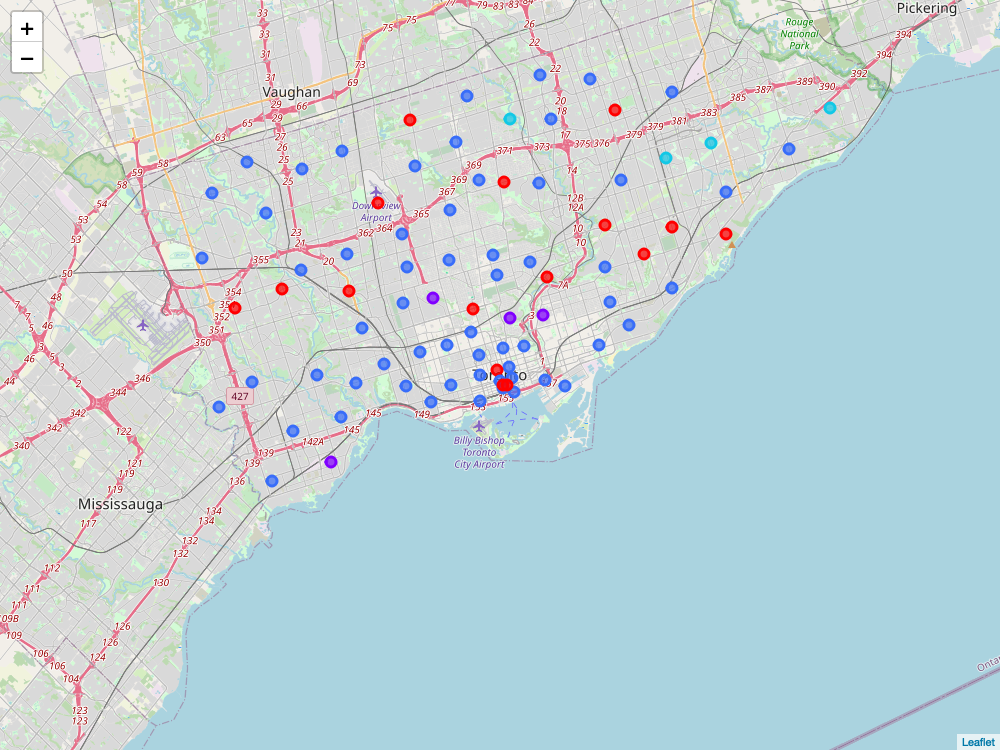

In [24]:
driver = selenium.webdriver.PhantomJS(executable_path='/Users/moaeedsajid/Downloads/phantomjs-2.1.1-macosx/bin/phantomjs')
driver.set_window_size(1000, 750)  # choose a resolution
map_clusters.save('map_clusters.html')
driver.get('map_clusters.html')
time.sleep(2)
driver.save_screenshot('map_clusters.png')

%matplotlib inline
from IPython.display import Image
Image('map_clusters.png')

In [26]:
print('\nCluster Label 0')
display(toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]])
print('\nCluster Label 1')
display(toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]])
print('\nCluster Label 2')
display(toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]])
print('\nCluster Label 3')
display(toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]])


Cluster Label 0


,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,0,Financial or Legal Service,Coffee Shop,Pizza Place,Intersection,Cosmetics Shop,Creperie,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School
24,Central Bay Street,0,Coffee Shop,Bubble Tea Shop,Sushi Restaurant,Japanese Restaurant,Middle Eastern Restaurant,Hotel,Ramen Restaurant,Modern European Restaurant,Gastropub,Spa
29,Thorncliffe Park,0,Yoga Studio,Coffee Shop,Sandwich Place,Supermarket,Middle Eastern Restaurant,Gas Station,Creperie,Distribution Center,Falafel Restaurant,Construction & Landscaping
38,"Kennedy Park, Ionview, East Birchmount Park",0,Discount Store,Coffee Shop,Department Store,Yoga Studio,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store
40,Downsview,0,Construction & Landscaping,Coffee Shop,Yoga Studio,Discount Store,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store
44,"Golden Mile, Clairlea, Oakridge",0,Intersection,Bus Station,Coffee Shop,Metro Station,Discount Store,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store
45,"York Mills, Silver Hills",0,Bank,Coffee Shop,Supermarket,Butcher,Ice Cream Shop,Pharmacy,Cosmetics Shop,Sandwich Place,Elementary School,Ethiopian Restaurant
48,"Commerce Court, Victoria Hotel",0,American Restaurant,Gym,Coffee Shop,Pub,Yoga Studio,Diner,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School
51,"Cliffside, Cliffcrest, Scarborough Village West",0,Sandwich Place,Pharmacy,Coffee Shop,Bank,Yoga Studio,Discount Store,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School
56,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",0,Construction & Landscaping,Light Rail Station,Coffee Shop,Yoga Studio,Discount Store,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School



Cluster Label 1


,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Humewood-Cedarvale,1,Grocery Store,Yoga Studio,Diner,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant
41,"The Danforth West, Riverdale",1,Discount Store,Grocery Store,Business Service,Yoga Studio,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store
88,"New Toronto, Mimico South, Humber Bay Shores",1,Grocery Store,Yoga Studio,Diner,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant
91,Rosedale,1,Grocery Store,Candy Store,Yoga Studio,Discount Store,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store



Cluster Label 2


,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,"Regent Park, Harbourfront",2,Pub,Café,Mexican Restaurant,Seafood Restaurant,Bank,Bakery,Distribution Center,Chocolate Shop,Athletics & Sports,Performing Arts Venue
3,"Lawrence Manor, Lawrence Heights",2,Clothing Store,Furniture / Home Store,American Restaurant,Cosmetics Shop,Restaurant,Food Court,Bookstore,Dessert Shop,Movie Theater,Jewelry Store
7,Don Mills,2,Restaurant,Athletics & Sports,Bank,Yoga Studio,Discount Store,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School
8,"Parkview Hill, Woodbine Gardens",2,Fast Food Restaurant,Gym / Fitness Center,Athletics & Sports,Bank,Gastropub,Pizza Place,Pet Store,Pharmacy,Rock Climbing Spot,Breakfast Spot
9,"Garden District, Ryerson",2,Coffee Shop,Clothing Store,Restaurant,Café,Hotel,Tea Room,Ramen Restaurant,Japanese Restaurant,Sandwich Place,Diner
10,Glencairn,2,Pizza Place,Fast Food Restaurant,Rental Car Location,Pub,Gas Station,Grocery Store,Convenience Store,Construction & Landscaping,Ethiopian Restaurant,Elementary School
11,"West Deane Park, Princess Gardens, Martin Grov...",2,Pizza Place,Sandwich Place,Tea Room,Yoga Studio,Diner,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store
14,Woodbine Heights,2,Bar,Breakfast Spot,Grocery Store,Music Store,Pharmacy,Gas Station,Pub,Yoga Studio,Falafel Restaurant,Ethiopian Restaurant
15,St. James Town,2,Gastropub,Salon / Barbershop,Hotel,Italian Restaurant,Department Store,Café,BBQ Joint,Coffee Shop,Restaurant,Creperie
17,"Eringate, Bloordale Gardens, Old Burnhamthorpe...",2,Liquor Store,Convenience Store,Cosmetics Shop,Pet Store,Coffee Shop,Pizza Place,Café,Beer Store,Distribution Center,Farm



Cluster Label 3


,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,"Rouge Hill, Port Union, Highland Creek",3,Construction & Landscaping,Yoga Studio,Diner,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant
26,Cedarbrae,3,Construction & Landscaping,Yoga Studio,Diner,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant
39,Bayview Village,3,Construction & Landscaping,Yoga Studio,Diner,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store,Eastern European Restaurant
65,"Dorset Park, Wexford Heights, Scarborough Town...",3,Brewery,Construction & Landscaping,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Falafel Restaurant,Ethiopian Restaurant,Elementary School,Electronics Store


### Understanding

From looking at these labels and businesses I believe the city has been segmented as follows...

0 - Red - Coffee shops and banks take precedence here so city centres     
1 - Purple - mixed in between cluster 2 so residential areas but maybe more quieter     
2 - Blue - Playgrounds, parks and lots of eateries in residential areas     
3 - Light Blue - To the side, more agriculture  